In [118]:
import pandas as pd
from matplotlib import pyplot as plt
#import scipy.stats as st
import numpy as np
import seaborn as sb
import seaborn 
import seaborn as sns
#!pip install scipy

In [119]:
#!pip install seaborn

In [120]:
health_data = pd.read_csv("C:/Users/bethe/Documents/group-1_project-1/healthcare_dataset.csv")

In [121]:
health_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [123]:
health_data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [124]:
#clean the data by dropping the columns not being used
health_data.drop(['Name', 'Blood Type', 'Doctor', 'Discharge Date', 'Room Number', 'Billing Amount', 'Medication', 'Test Results'], axis=1, inplace=True)
#print(health_data)
health_data.head()

,Age,Gender,Medical Condition,Date of Admission,Hospital,Insurance Provider,Admission Type
0,30,Male,Cancer,2024-01-31,Sons and Miller,Blue Cross,Urgent
1,62,Male,Obesity,2019-08-20,Kim Inc,Medicare,Emergency
2,76,Female,Obesity,2022-09-22,Cook PLC,Aetna,Emergency
3,28,Female,Diabetes,2020-11-18,"Hernandez Rogers and Vang,",Medicare,Elective
4,43,Female,Cancer,2022-09-19,White-White,Aetna,Urgent


In [125]:
health_data.isnull().sum()

Age                   0
Gender                0
Medical Condition     0
Date of Admission     0
Hospital              0
Insurance Provider    0
Admission Type        0
dtype: int64

In [203]:
# Show groupby data for medical condition and insurance provider
plt.figure(figsize=(14, 8))
health_data.groupby(['Medical Condition', 'Insurance Provider']).size().unstack()

Insurance Provider,Aetna,Blue Cross,Cigna,Medicare,UnitedHealthcare
Medical Condition,,,,,
Arthritis,1832,1852,1900,1851,1873
Asthma,1740,1835,1907,1833,1870
Cancer,1819,1808,1864,1866,1870
Diabetes,1842,1860,1893,1903,1806
Hypertension,1876,1813,1821,1847,1888
Obesity,1804,1891,1864,1854,1818


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

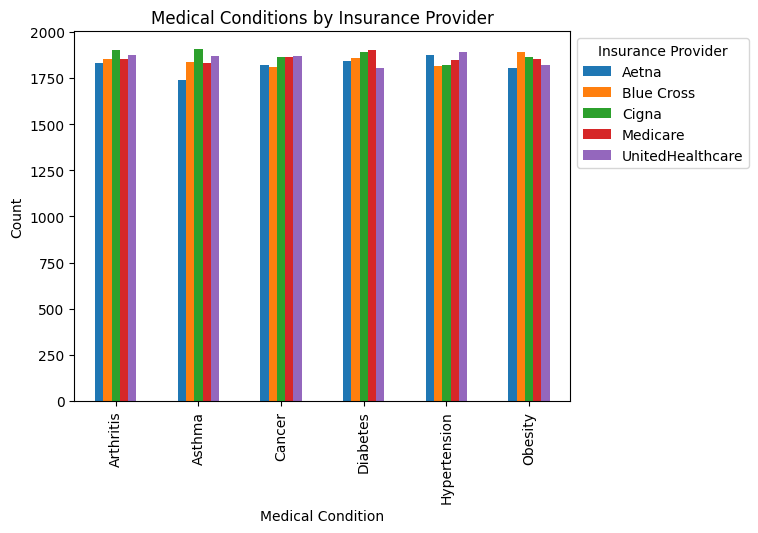

In [204]:
# Create a grouped bar chart for medical condition and insurance provider
plt.figure(figsize=(14, 8))
health_data.groupby(['Medical Condition', 'Insurance Provider']).size().unstack().plot(kind='bar')
plt.title('Medical Conditions by Insurance Provider')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.legend(title='Insurance Provider', bbox_to_anchor=(1, 1))
plt.show()

In [144]:
#Group data by Age and count the type of admissions by age

#grouped_health = health_data.groupby(["Age","Admission Type"]).count().reset_index()
grouped_health = health_data.groupby(['Age','Admission Type']).size().fillna(0)
grouped_health

Age  Admission Type
13   Elective           2
     Emergency          8
     Urgent             4
14   Elective           8
     Emergency          7
                       ..
88   Emergency          6
     Urgent            10
89   Elective           5
     Emergency          2
     Urgent             1
Length: 231, dtype: int64

In [165]:
#Create bins for age ranges
bins = [12, 27, 43, 59, 69, 100]

#Create labels for each age range
group_ages = ['Gen Z', 'Millenials', 'Gen X', 'Boomers', 'Seniors']
print(group_ages)

['Gen Z', 'Millenials', 'Gen X', 'Boomers', 'Seniors']


In [166]:
age_range = pd.cut(health_data['Age'], bins, labels=group_ages)
print(age_range)

0        Millenials
1           Boomers
2           Seniors
3        Millenials
4        Millenials
            ...    
55495    Millenials
55496       Boomers
55497    Millenials
55498    Millenials
55499         Gen X
Name: Age, Length: 55500, dtype: category
Categories (5, object): ['Gen Z' < 'Millenials' < 'Gen X' < 'Boomers' < 'Seniors']


C:\Users\bethe\AppData\Local\Temp\ipykernel_11404\1009755738.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined_data.groupby(['Age', 'Admission Type']).size().unstack()


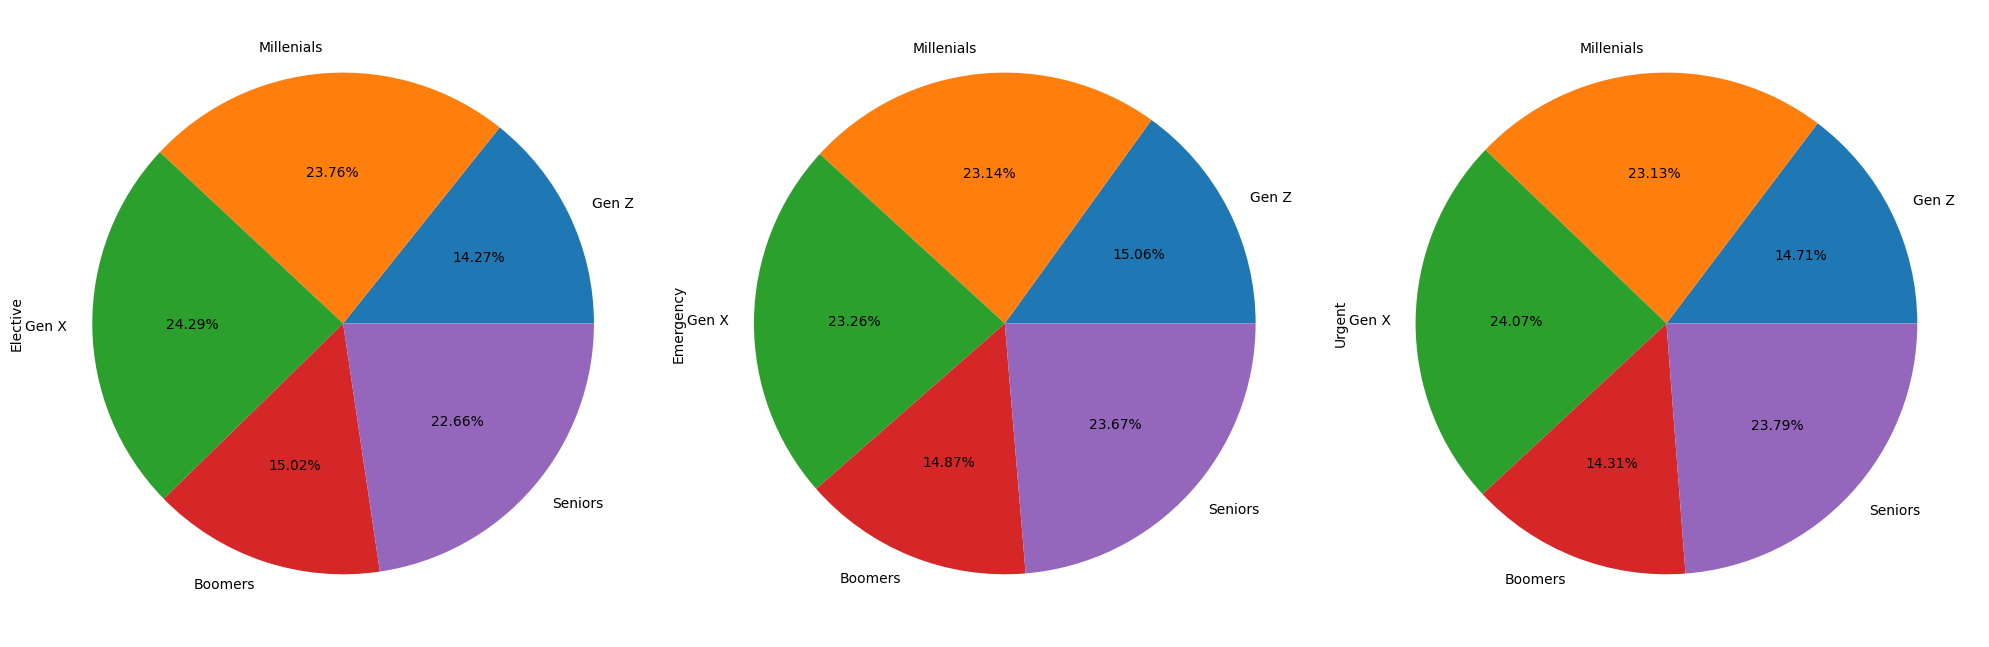

In [197]:
combined_data = pd.concat([age_range, health_data['Admission Type']], axis=1)
counts = combined_data.groupby(['Age', 'Admission Type']).size().unstack()
counts.plot(kind='pie', subplots=True, figsize=(20, 10), autopct= '%1.2f%%', legend=False)
plt.tight_layout()
plt.show()